In [8]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, FunctionTransformer 
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error as MSE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

### Import Dataset

In [10]:
df = pd.read_csv("housing.csv")
df[::200]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.3,4.45,32.9
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.9,26.77,5.6


### Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
# Statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


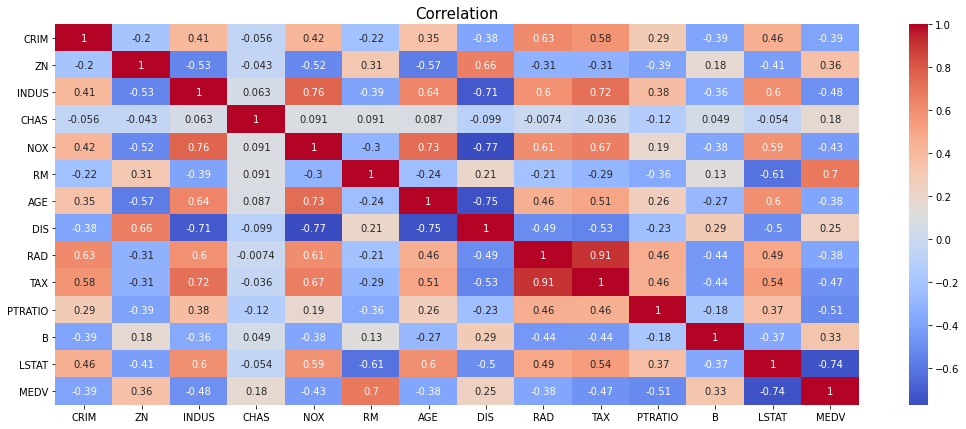

In [13]:
# Buvariate Analysis
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title("Correlation", size = 15)
plt.show()

**Split Data into Features and Target**

In [14]:
#Features
X = df[df.columns.drop("MEDV")]

# Target
y = df["MEDV"]

### Pipelines using sklearn

In [15]:
rf_pipeline = Pipeline([("scaler", StandardScaler()),
                        ("model", RandomForestRegressor())])

scores = cross_val_score(rf_pipeline, 
                         X,
                         y,
                         scoring = "neg_mean_squared_error",
                         cv = 10)

final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE:", final_avg_rmse)

Final RMSE: 4.186599912806548


In [16]:
# Split Data into Training and Test Set
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 2)

# Fit Data into Model for Training
rf_pipeline.fit(x_train, y_train)

# Prediction
y_pred = rf_pipeline.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::20]

,Actual,Predicted
463,20.2,22.491
334,20.7,23.390
301,22.0,25.710
297,20.3,20.258
40,34.9,33.800
194,29.1,30.054
341,32.7,33.578
496,19.7,19.045


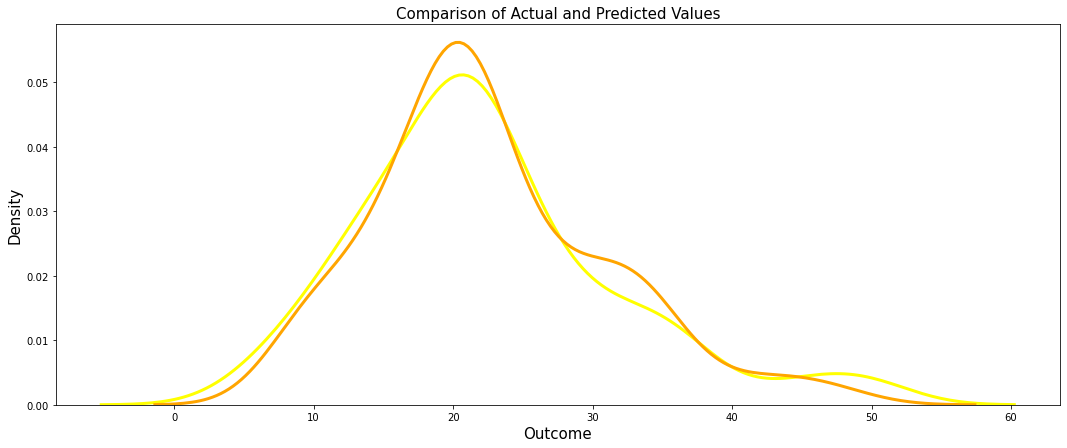

In [17]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "yellow", linewidth = 3)
sns.kdeplot(y_pred, label = "Predicted", color = "orange", linewidth = 3)
plt.title("Comparison of Actual and Predicted Values", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.show()

### Incorporating XGBoost into pipelines

In [18]:
df = pd.read_csv("housing.csv")

X = df[df.columns.drop("MEDV")]
y = df["MEDV"]

xgb_pipeline = Pipeline([("st_scaler", StandardScaler()),
                         ("xgb_model", xgb.XGBRegressor())])

scores = cross_val_score(xgb_pipeline,
                         X,
                         y,
                         scoring = "neg_mean_squared_error",
                         cv = 10)

final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))

print("Final XGB RMSE:", final_avg_rmse)

Final XGB RMSE: 4.37678209879882


### Tuning XGBoost hyperparameters in a pipeline

In [19]:
df = pd.read_csv("housing.csv")

X = df[df.columns.drop("MEDV")]
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 2)
xgb_pipeline = Pipeline([("st_scaler", StandardScaler()),
                        ("xgb_model", xgb.XGBRegressor())])

gbm_param_grid = {"xgb_model__subsample": np.arange(0.05, 1, 0.05),
                  "xgb_model__max_depth": np.arange(3, 20, 1),
                  "xgb_model__colsample_bytree": np.arange(0.1, 1.05, 0.05)}

randomized_neg_mse = RandomizedSearchCV(estimator = xgb_pipeline,
                                        param_distributions = gbm_param_grid,
                                        n_iter = 10,
                                        scoring = "neg_mean_squared_error",
                                        cv = 4)

randomized_neg_mse.fit(X_train, y_train)

y_pred = randomized_neg_mse.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::20]

,Actual,Predicted
463,20.2,20.842178
334,20.7,22.150005
301,22.0,26.115078
297,20.3,19.638281
40,34.9,34.395725
194,29.1,28.667803
341,32.7,35.138111
496,19.7,15.540081


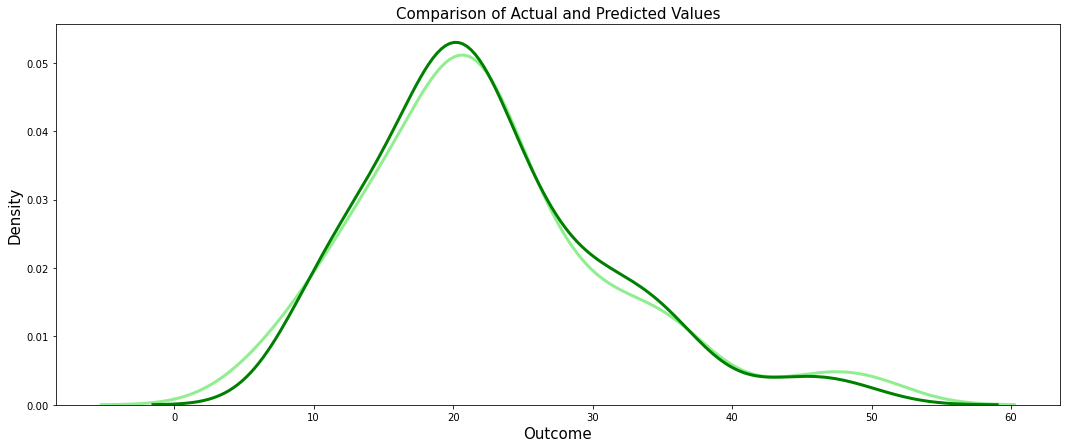

In [20]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "lightgreen", linewidth = 3)
sns.kdeplot(y_pred, label = "Predicted", color = "green", linewidth = 3)
plt.title("Comparison of Actual and Predicted Values", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.show()

In [21]:
rmse = MSE(y_test, y_pred)**(1/2)
rmse

3.3670221608846074

### Import Ames Unprocessed Data

In [22]:
df = pd.read_csv("ames_unprocessed_data.csv")
df[::400]

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
400,120,RL,38.0,14963,Veenker,TwnhsE,1Story,8,5,1996,...,1288,1,0,1,1,1,2,500,Y,245500
800,60,RL,79.0,12798,ClearCr,1Fam,2Story,6,5,1997,...,1688,1,0,2,1,4,0,603,Y,200000
1200,20,RL,71.0,9353,NAmes,1Fam,1Story,4,5,1970,...,864,0,0,1,0,3,0,280,Y,116050


### Data Preparation

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

In [24]:
# Fill Null values with 0
df["LotFrontage"] = df["LotFrontage"].fillna(0)

### Preprocessing within a pipeline

In [25]:
# Features
X = df[df.columns.drop("SalePrice")]

# Target
y = df["SalePrice"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 3)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse = False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)


# Fit the pipeline
xgb_pipeline.fit(X_train.to_dict("records"), y_train)

y_pred = xgb_pipeline.predict(X_test.to_dict("records"))
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::80]

,Actual,Predicted
140,115000,103712.156250
840,140000,174245.500000
899,135000,129860.031250
166,190000,160879.140625
1357,149900,150540.484375
46,239686,269486.718750


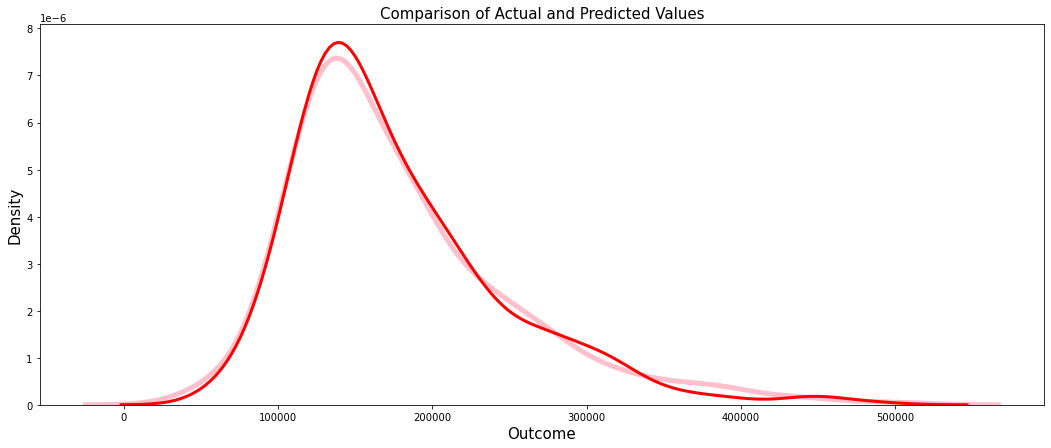

In [27]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "pink", linewidth = 5)
sns.kdeplot(y_pred, label = "Predicted", color = "red", linewidth = 3)
plt.title("Comparison of Actual and Predicted Values", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.show()

In [28]:
RMSE = MSE(y_test, y_pred)**(1/2)
RMSE

25541.253764490684

### Cross-validating XGBoost model

In [29]:
# Fill LotFrontage missing values with 0
df["LotFrontage"] = df["LotFrontage"].fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse = False)),
         ("xgb_model", xgb.XGBRegressor(max_depth = 2,
                       objective = "reg:squarederror"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val = cross_val_score(xgb_pipeline,
                            X.to_dict("records"),
                            y,
                            scoring = "neg_mean_squared_error",
                            cv = 10)
# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val))))

10-fold RMSE:  27683.04157118635


### Kidney disease case study I: Categorical & Numerical Imputer

In [122]:
df = pd.read_csv('chronic_kidney_disease.csv', na_values='?')
df[:3]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd


In [ ]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature], Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier())
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, kidney_data, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))